In [1]:
import os

import numpy as np
import pandas as pd

from scipy import stats

import xarray as xr
import geopandas as gpd
import xesmf as xe
import rioxarray as rio
import geoviews as gv

gv.extension("matplotlib")
gv.output( size = 600 )

def hook(plot, element):
    cax = plot.handles["cax"]
    ax = plot.handles["axis"]
    bbox = ax.get_position()
    l, b, w, h = bbox.x0, bbox.y0, bbox.width, bbox.height
    cax.set_position([l, 0.85*b, w, 0.05*h])

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

In [2]:
# Códigos nacionales y subnacionales
ix  = "ISO_A3"

wb_path = "../../Bases_de_datos/CCKP_NetCDF/"
map_path = "../../Bases_de_datos/Mapas/WB_countries_Admin0_10m"
borders_path = ( "../../Bases_de_datos/Mapas/"
    + "Natural_Earth/ne_50m_admin_0_countries" )
path_r = "../results/"
wb_files = os.listdir(wb_path)
for i, f in enumerate(wb_files):
    if f[0] in ["~", "."]: wb_files.remove(f)
for i, f in enumerate(wb_files): print(f"{i}: {f}")

borders = gpd.read_file(borders_path).drop(
    columns = [ix] ).set_index("ISO_A3_EH")
borders.index.name = ix
borders = borders[ borders["ISO_N3_EH"] != "-99" ]
borders = borders[ ~borders.index.duplicated() ]
countries = gv.Path( borders[["geometry"]]
    ).opts( linewidth = 0.5, color = "k" )

borders["Area"] = borders.to_crs(8857).area

0: climatology-pr-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
1: climatology-popcount-annual-mean_pop-x0.25_gpw-v4-rev11-ssp245_climatology_mean_2040-2059.nc
2: climatology-spei12-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
3: climatology-rx1day-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
4: climatology-popcount-annual-mean_pop-x0.25_gpw-v4-rev11-historical_climatology_mean_1995-2014.nc
5: climatology-hd40-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc
6: climatology-pr-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
7: climatology-hd40-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
8: climatology-spei12-annual-mean_cmip6-x0.25_ensemble-all-ssp245_climatology_median_2040-2059.nc
9: climatology-rx1day-annual-mean_cmip6-x0.25_ensemble-all-historical_climatology_median_1995-2014.nc


In [3]:
# Datos

# Carpetas
path_catalog = "../../Bases_de_datos/Data_catalog.csv"
data_d = "../results/"
iso = "../../Bases_de_datos/Country_ISO_code.csv"

# Relación de códigos Banco Mundial y Natural Earth (ISO 3166-2)
code_path = "../../Bases_de_datos/Subnational_Code_WB_ISO.csv"

# Catálogo de datos
df_c = pd.read_csv(path_catalog)


df_iso = pd.read_csv(iso).set_index("alpha-3")
df_iso.index.name = ix

In [4]:
p = "climatology-popcount-annual-mean"

i = 4
pop_h = xr.open_dataset(wb_path + wb_files[i])
pop_h = pop_h.rio.write_crs(borders.crs)
i = 1
pop_f = xr.open_dataset(wb_path + wb_files[i])
pop_f = pop_f.rio.write_crs(borders.crs)

gdf_b = borders[borders["Area"] >= 1e9]
pop_h["country"] = pop_h[p].copy()

for i in gdf_b.index:
    ds_c = xr.full_like( pop_h[[p]],
        int(gdf_b.loc[gdf_b.index == i, "ISO_N3_EH"].iloc[0]) )
    pop_w = ds_c.rio.clip( gdf_b[gdf_b.index == i].geometry,
        drop = False, invert = False,all_touched = False )
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

for l in range(2):
    iso = pop_h["country"].values
    iso_c  = iso.copy()
    for i in range(iso.shape[1]):
        for j in range(iso.shape[2]):

            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            if i_l < 0: i_l = iso.shape[1] - 1
            if i_p == iso.shape[1]: i_p = 0
            if j_l < 0: j_l = iso.shape[2] - 1
            if j_p == iso.shape[2]: j_p = 0

            adj = [0] * 8
            adj[0] = iso[0, i_l, j_p]
            adj[1] = iso[0, i, j_p]
            adj[2] = iso[0, i_p, j_p]
            adj[3] = iso[0, i_l, j]
            cell =  iso[0, i, j]
            adj[4] = iso[0, i_p, j]
            adj[5] = iso[0, i_l, j_l]
            adj[6] = iso[0, i, j_l]
            adj[7] = iso[0, i_p, j_l]

            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                    if len(adj_c) > 0:
                        m = stats.mode(adj_c)[0]
                        if not (type(m) == np.float32): m = m[0]
                        iso_c[0, i, j] = int(m)

    pop_h["country"] = ( ("time", "lat", "lon"), iso_c )

gdf_s = borders[borders["Area"] < 1e9]
a = 0

for i in gdf_s.index: 
    ds_c = xr.full_like( pop_h[["climatology-popcount-annual-mean"]],
        int(gdf_s.loc[gdf_s.index == i, "ISO_N3_EH"].iloc[0]) )
    pop_w = ds_c.rio.clip( gdf_s[gdf_s.index == i].geometry,
        drop = False, invert = False, all_touched = True )
    pop_h["country"] = pop_h["country"].where( pop_w[p].isnull(), pop_w[p] )

iso = pop_h["country"].values
iso_c  = iso.copy()

for i in range(iso.shape[1]):
    for j in range(iso.shape[2]):
        cell = iso_c[0, i, j]
        if cell in borders["ISO_N3_EH"].astype(int).values: pass
        else: iso_c[0, i, j] = np.nan

pop_h["country"] = ( ("time", "lat", "lon"), iso_c )

#pop_h.to_netcdf("a.nc")
df_pop_h = pop_h[ [p, "country"] ].to_dataframe()


gdf_b = borders[borders["Area"] >= 1e9]
pop_f["country"] = pop_f[p].copy()

for i in gdf_b.index:
    ds_c = xr.full_like( pop_f[[p]],
        int(gdf_b.loc[gdf_b.index == i, "ISO_N3_EH"].iloc[0]) )
    pop_w = ds_c.rio.clip( gdf_b[gdf_b.index == i].geometry,
        drop = False, invert = False,all_touched = False )
    pop_f["country"] = pop_f["country"].where( pop_w[p].isnull(), pop_w[p] )

for l in range(2):
    iso = pop_f["country"].values
    iso_c  = iso.copy()
    for i in range(iso.shape[1]):
        for j in range(iso.shape[2]):

            i_l = i - 1
            i_p = i + 1
            j_l = j - 1
            j_p = j + 1

            if i_l < 0: i_l = iso.shape[1] - 1
            if i_p == iso.shape[1]: i_p = 0
            if j_l < 0: j_l = iso.shape[2] - 1
            if j_p == iso.shape[2]: j_p = 0

            adj = [0] * 8
            adj[0] = iso[0, i_l, j_p]
            adj[1] = iso[0, i, j_p]
            adj[2] = iso[0, i_p, j_p]
            adj[3] = iso[0, i_l, j]
            cell =  iso[0, i, j]
            adj[4] = iso[0, i_p, j]
            adj[5] = iso[0, i_l, j_l]
            adj[6] = iso[0, i, j_l]
            adj[7] = iso[0, i_p, j_l]

            if ( np.isnan(cell)
                or (cell in borders["ISO_N3_EH"].astype(int).values) ):
                pass
            else:
                adj_c = []
                for k in adj:
                    if k in borders["ISO_N3_EH"].astype(int).values:
                        adj_c.append(k)
                    if len(adj_c) > 0:
                        m = stats.mode(adj_c)[0]
                        if not (type(m) == np.float32): m = m[0]
                        iso_c[0, i, j] = int(m)

    pop_f["country"] = ( ("time", "lat", "lon"), iso_c )

gdf_s = borders[borders["Area"] < 1e9]
a = 0

for i in gdf_s.index: 
    ds_c = xr.full_like( pop_f[["climatology-popcount-annual-mean"]],
        int(gdf_s.loc[gdf_s.index == i, "ISO_N3_EH"].iloc[0]) )
    pop_w = ds_c.rio.clip( gdf_s[gdf_s.index == i].geometry,
        drop = False, invert = False, all_touched = True )
    pop_f["country"] = pop_f["country"].where( pop_w[p].isnull(), pop_w[p] )

iso = pop_f["country"].values
iso_c  = iso.copy()

for i in range(iso.shape[1]):
    for j in range(iso.shape[2]):
        cell = iso_c[0, i, j]
        if cell in borders["ISO_N3_EH"].astype(int).values: pass
        else: iso_c[0, i, j] = np.nan

pop_f["country"] = ( ("time", "lat", "lon"), iso_c )

#pop_f.to_netcdf("a.nc")
df_pop_f = pop_f[ [p, "country"] ].to_dataframe()

In [5]:
df_pop_h.loc[ df_pop_h["country"] == 242, p ].sum()

807657.4

In [6]:
df_pop_f.loc[ df_pop_f["country"] == 242, p ].sum()

937559.1

:Polygons   [Longitude,Latitude]   (Sea-level rise exposure index)
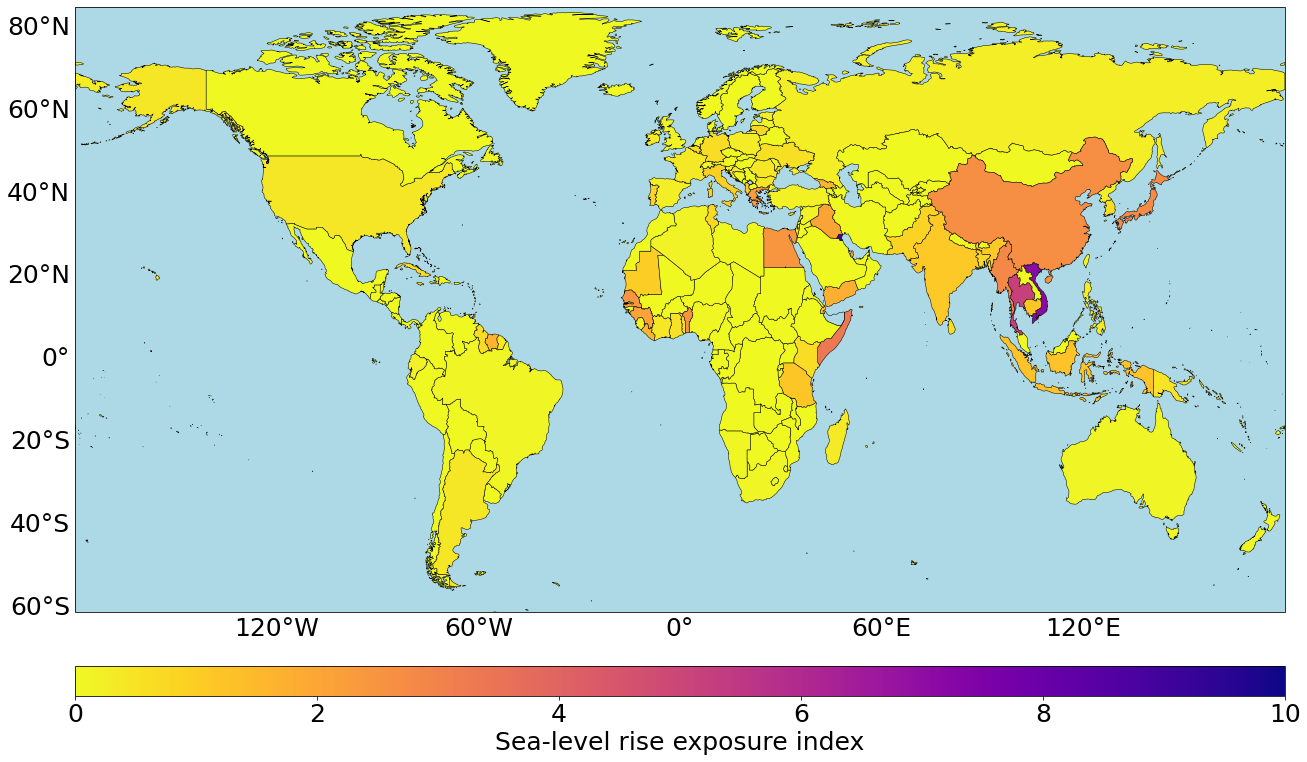

,name,Sea-level rise exposure index
ISO_A3,,
MCO,Monaco,10.000000
KWT,Kuwait,8.990419
MAC,Macao,8.866994
ABW,Aruba,7.715355
VNM,Viet Nam,7.083884
MSR,Montserrat,5.994232
THA,Thailand,5.186552
WLF,Wallis and Futuna,4.142665
GIB,Gibraltar,3.901301


In [7]:
id = "pone.0118571.s004"
col = [
    "Major area, region, country or area",
    "Baseline - total population 2000 [thousand]",
    "Baseline - Flood plain population 2000",
    "Scenario D - Total population 2060 [thousand]",
    "Scenario D - Flood plain population 2060",
    ]

# Cargamos el archivo
df = pd.read_csv( "../../"
    + df_c.loc[df_c["ID"]==id, "Path"].iloc[0]
    + df_c.loc[df_c["ID"]==id, "Filename" ].iloc[0],
    index_col = "alpha-3", )
df = df.loc[ df.index != "-99", col ]

vn = "Sea-level rise exposure index"

df["% Population 2000"] = 100 * df[col[2]] / ( df[col[1]] * 1000 )
df["% Population 2060"] = 100 * df[col[4]] / ( df[col[3]] * 1000 )

df_iso[vn] = df["% Population 2060"] - df["% Population 2000"]
df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

df_iso[["name", vn]].sort_values(vn, ascending = False).head(10)

In [8]:
df.loc[["FJI"]]

,"Major area, region, country or area",Baseline - total population 2000 [thousand],Baseline - Flood plain population 2000,Scenario D - Total population 2060 [thousand],Scenario D - Flood plain population 2060,% Population 2000,% Population 2060
alpha-3,,,,,,,
FJI,Fiji,812,33804,1032,33913,4.163054,3.286143


In [9]:
v = "climatology-spei12-annual-mean"
tr = -0.15

i = 2
ds_h = xr.open_dataset(wb_path + wb_files[i])
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
ds_h[v] = ds_h[v].where( ds_h[v] <= tr, 0 )
ds_h[v] = ds_h[v].where( ds_h[v] == 0, 1 )
ds_h["Exposed population"] = pop_h[p] * ds_h[v]

i = 8
ds_f = xr.open_dataset(wb_path + wb_files[i])
var_f = ds_f.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
ds_f[v] = ds_f[v].where( ds_f[v] <= tr, 0 )
ds_f[v] = ds_f[v].where( ds_f[v] == 0, 1 )
ds_f["Exposed population"] = pop_f[p] * ds_f[v]

df_h = ds_h[ [v, "Exposed population"] ].to_dataframe()
df_h["country"] = df_pop_h["country"]
df_h[p] = df_pop_h[p]
df_h = df_h.reset_index().drop(columns = "time").set_index("country")
df_h = df_h[ ~df_h.index.isnull() ]
df_hc = df_h[ [p, "Exposed population"] ].groupby("country").sum()
df_hc["% Exposed population"] = ( df_hc["Exposed population"] / df_hc[p] )

df_f = ds_f[ [v, "Exposed population"] ].to_dataframe()
df_f["country"] = df_pop_f["country"]
df_f[p] = df_pop_f[p]
df_f = df_f.reset_index().drop(columns = "time").set_index("country")
df_f = df_f[ ~df_f.index.isnull() ]
df_fc = df_f[ [p, "Exposed population"] ].groupby("country").sum()
df_fc["% Exposed population"] = ( df_fc["Exposed population"] / df_fc[p] )

vn = "Drought exposure index"
df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)
df_fc["NAME"] = names["NAME"]
df_fc[ix] = names[ix]
df_fc = df_fc.reset_index().set_index(ix)

df_iso[vn] = df_fc[vn]
df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

df_fc.sort_values(vn, ascending = False).head(10)

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Drought exposure index,NAME
ISO_A3,,,,,,
ISR,376.0,1.283378e+07,1.283378e+07,1.000000,1.000000,Israel
LBN,422.0,4.804990e+06,4.804990e+06,1.000000,1.000000,Lebanon
PCN,612.0,6.500599e+01,6.500599e+01,1.000000,1.000000,Pitcairn Is.
DMA,212.0,7.603438e+04,7.603438e+04,1.000000,1.000000,Dominica
PSE,275.0,8.080783e+06,8.080783e+06,1.000000,1.000000,Palestine
CHL,152.0,2.038885e+07,2.007530e+07,0.984621,0.984174,Chile
SUR,740.0,6.571364e+05,6.372544e+05,0.969745,0.969745,Suriname
JOR,400.0,1.248346e+07,1.209987e+07,0.969272,0.969272,Jordan
DZA,12.0,4.888387e+07,4.714332e+07,0.964394,0.964175,Algeria


In [10]:
df_hc.loc[[242]]

,climatology-popcount-annual-mean,Exposed population,% Exposed population
country,,,
242.0,807657.375,0.0,0.0


In [11]:
df_fc.loc[["FJI"]]

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Drought exposure index,NAME
ISO_A3,,,,,,
FJI,242.0,937559.125,0.0,0.0,0.0,Fiji


:Overlay
   .Image.I :Image   [lon,lat]   (Average 12-month SPEI, 2040-2060, climate scenario SSP2-4.5)
   .Path.I  :Path   [Longitude,Latitude]
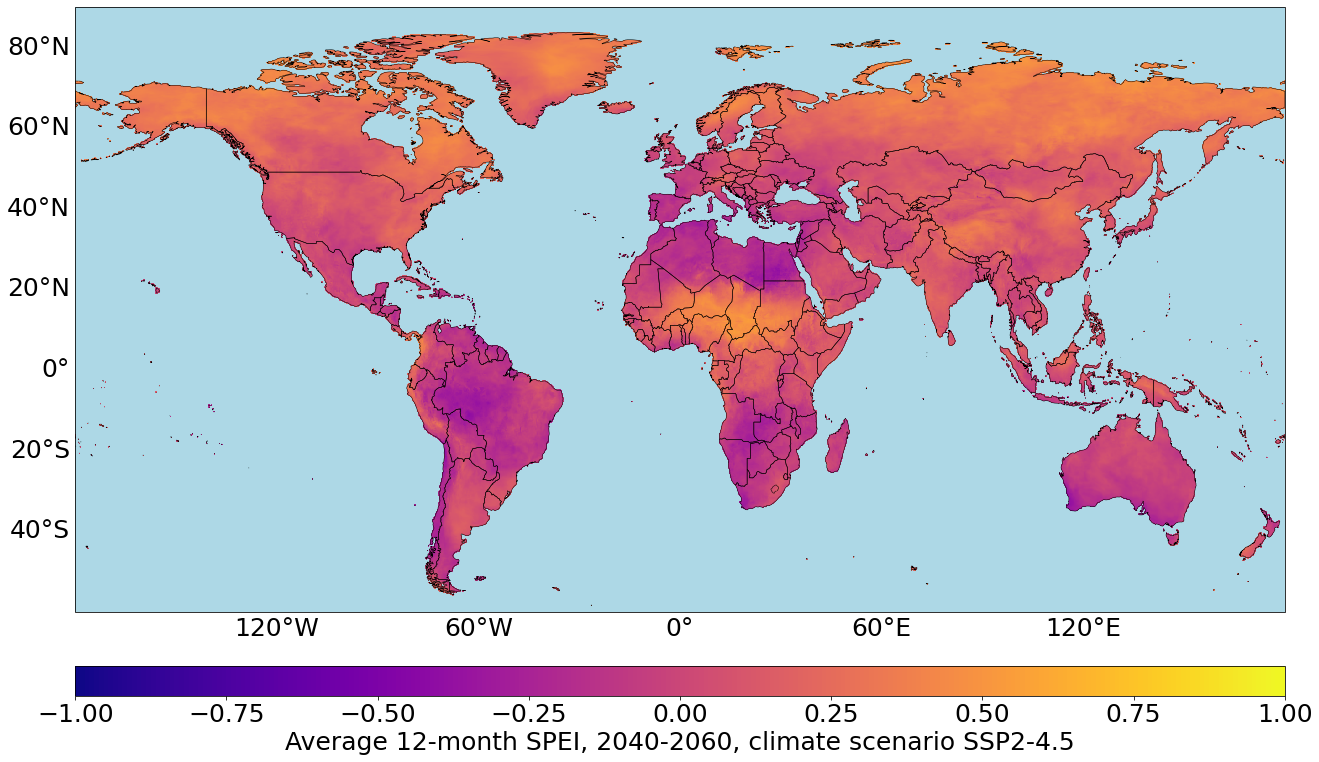

:Polygons   [Longitude,Latitude]   (Drought exposure index)
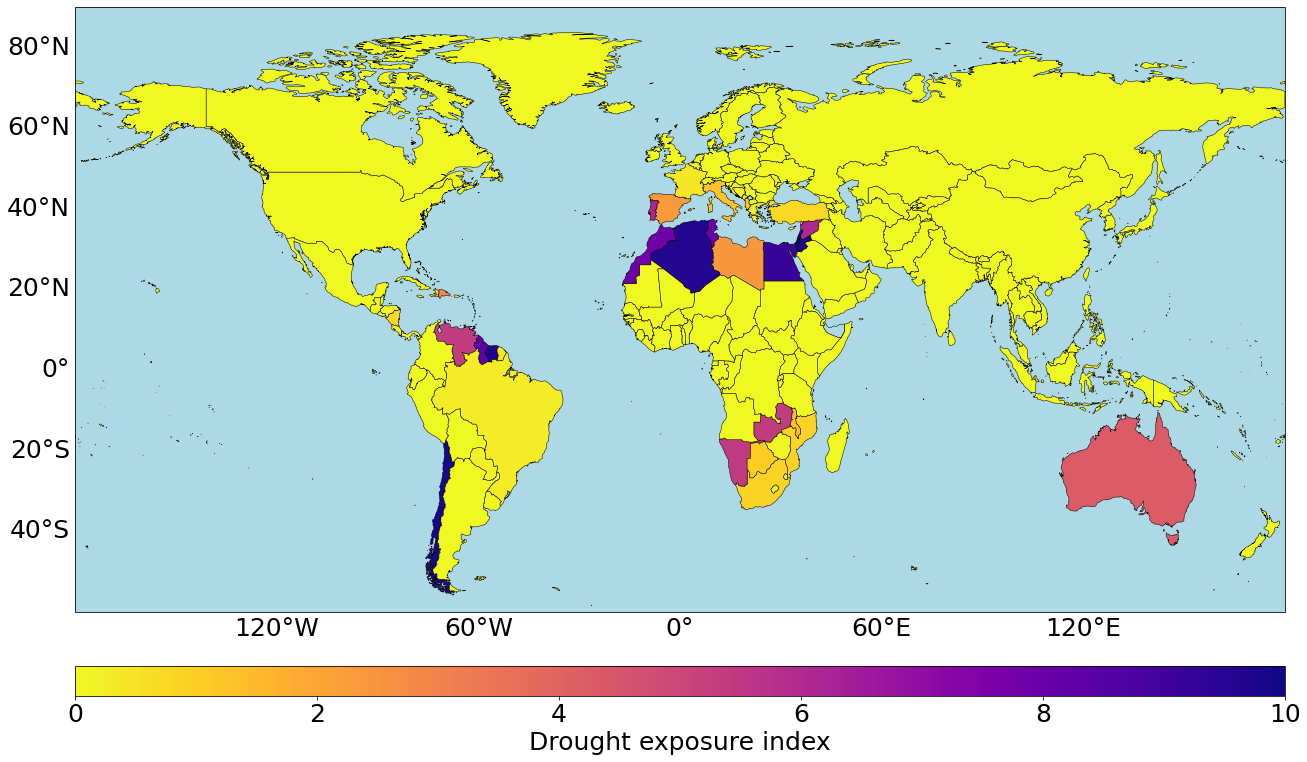

In [12]:
vn_plot = ( "Average 12-month SPEI, "
     + "2040-2060, climate scenario SSP2-4.5" )
ds_map = var_f.rename( {v: vn_plot } )
ds_map[vn_plot] = ds_map[vn_plot].fillna(0)
ds_map = ds_map.rio.write_crs(borders.crs)
ds_map = ds_map.rio.set_spatial_dims("lon", "lat")
ds_map = ds_map.rio.clip( borders.dissolve().geometry,
    drop = False, invert = False, all_touched = True )

min = np.floor( np.nanmin(ds_map[vn_plot].values) )
max = np.ceil( np.nanmax(ds_map[vn_plot].values) )

v_map = gv.Image( gv.Dataset( ds_map, ["lon", "lat"],
    vdims = gv.Dimension(vn_plot, range = ( min, max ) ) )
    ).opts( colorbar = True, cmap = "plasma",
    hooks = [hook], ylim = (-60, 90), bgcolor = "lightblue",
    colorbar_opts = {"orientation": "horizontal"} )
img = ( v_map * countries ).opts(aspect = 2, fontscale = 2.5)
gv.output( img, size = 600 )

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-60, 90), bgcolor = "lightblue" )
gv.output( map, size = 600 )

In [13]:
v = "climatology-hd40-annual-mean"
tr = 8*7

i = 5
ds_h = xr.open_dataset(wb_path + wb_files[i])
ds_h[v] = ds_h[v].astype(float) / 1e9 / 86400
var_h = ds_h.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
ds_h[v] = ds_h[v].where( ds_h[v] >= tr, 0 )
ds_h[v] = ds_h[v].where( ds_h[v] == 0, 1 )
ds_h["Exposed population"] = pop_h[p] * ds_h[v]

i = 7
ds_f = xr.open_dataset(wb_path + wb_files[i])
ds_f[v] = ds_f[v].astype(float) / 1e9 / 86400
var_f = ds_f.copy().drop_vars( ["lon_bnds", "lat_bnds"] )
ds_f[v] = ds_f[v].where( ds_f[v] >= tr, 0 )
ds_f[v] = ds_f[v].where( ds_f[v] == 0, 1 )
ds_f["Exposed population"] = pop_f[p] * ds_f[v]

df_h = ds_h[ [v, "Exposed population"] ].to_dataframe()
df_h["country"] = df_pop_h["country"]
df_h[p] = df_pop_h[p]
df_h = df_h.reset_index().drop(columns = "time").set_index("country")
df_h = df_h[ ~df_h.index.isnull() ]
df_hc = df_h[ [p, "Exposed population"] ].groupby("country").sum()
df_hc["% Exposed population"] = ( df_hc["Exposed population"] / df_hc[p] )

df_f = ds_f[ [v, "Exposed population"] ].to_dataframe()
df_f["country"] = df_pop_f["country"]
df_f[p] = df_pop_f[p]
df_f = df_f.reset_index().drop(columns = "time").set_index("country")
df_f = df_f[ ~df_f.index.isnull() ]
df_fc = df_f[ [p, "Exposed population"] ].groupby("country").sum()
df_fc["% Exposed population"] = ( df_fc["Exposed population"] / df_fc[p] )

vn = "Extreme temperature exposure index"
df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)
df_fc["NAME"] = names["NAME"]
df_fc[ix] = names[ix]
df_fc = df_fc.reset_index().set_index(ix)

df_iso[vn] = df_fc[vn]
df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

df_fc.sort_values(vn, ascending = False).head(10)

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Extreme temperature exposure index,NAME
ISO_A3,,,,,,
NER,562.0,5.040110e+07,4.977788e+07,0.987635,0.835339,Niger
QAT,634.0,4.098575e+06,3.502640e+06,0.854599,0.624854,Qatar
DJI,262.0,1.058824e+06,4.403718e+05,0.415906,0.394013,Djibouti
BFA,854.0,3.830249e+07,1.318044e+07,0.344115,0.331984,Burkina Faso
SYR,760.0,3.339885e+07,1.077746e+07,0.322690,0.319927,Syria
MLI,466.0,3.562936e+07,2.002491e+07,0.562034,0.293183,Mali
TCD,148.0,2.445195e+07,1.509499e+07,0.617332,0.292131,Chad
PAK,586.0,2.923170e+08,1.601109e+08,0.547730,0.195364,Pakistan
SDN,729.0,6.498030e+07,4.413155e+07,0.679153,0.191530,Sudan


In [14]:
df_hc.loc[[242]]

,climatology-popcount-annual-mean,Exposed population,% Exposed population
country,,,
242.0,807657.375,0.0,0.0


In [15]:
df_fc.loc[["FJI"]]

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Extreme temperature exposure index,NAME
ISO_A3,,,,,,
FJI,242.0,937559.125,0.0,0.0,0.0,Fiji


:Overlay
   .Image.I :Image   [lon,lat]   (Number of days exceeding 40°C, 2040-2060, climate scenario SSP2-4.5)
   .Path.I  :Path   [Longitude,Latitude]
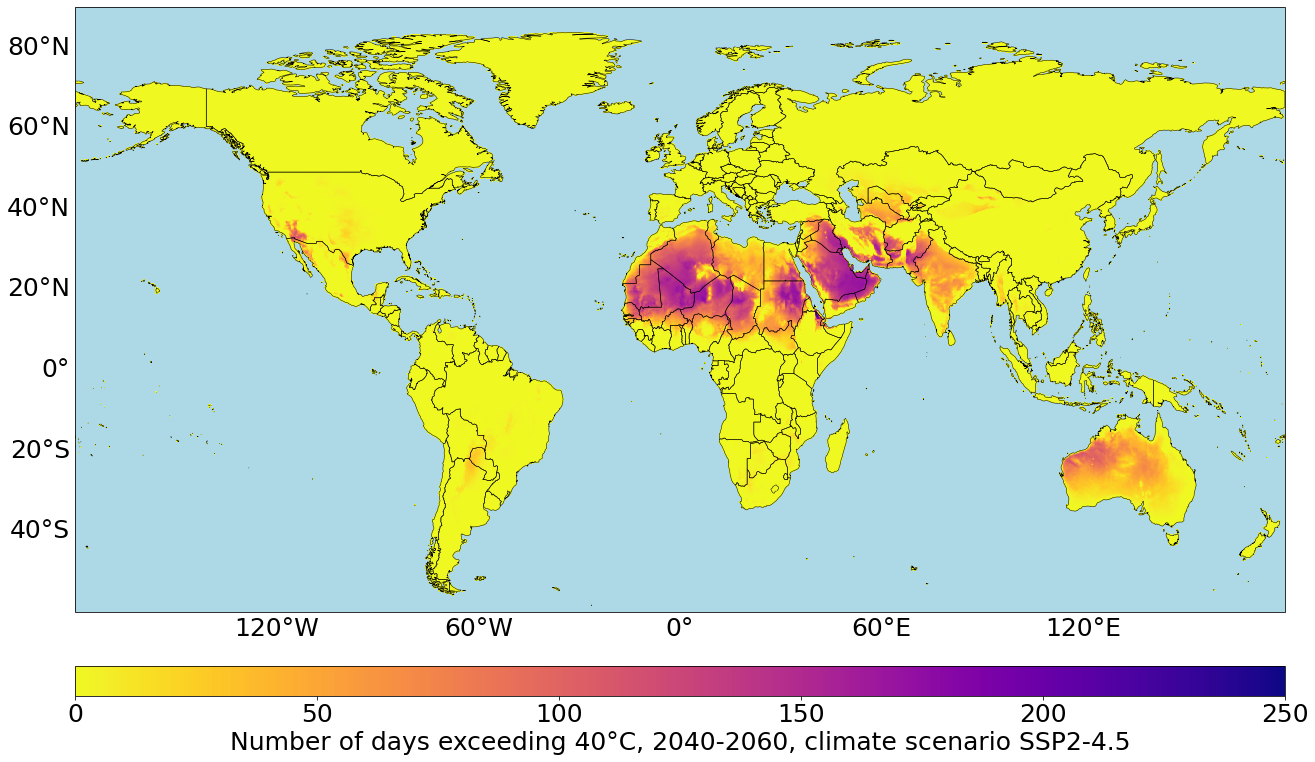

:Polygons   [Longitude,Latitude]   (Extreme temperature exposure index)
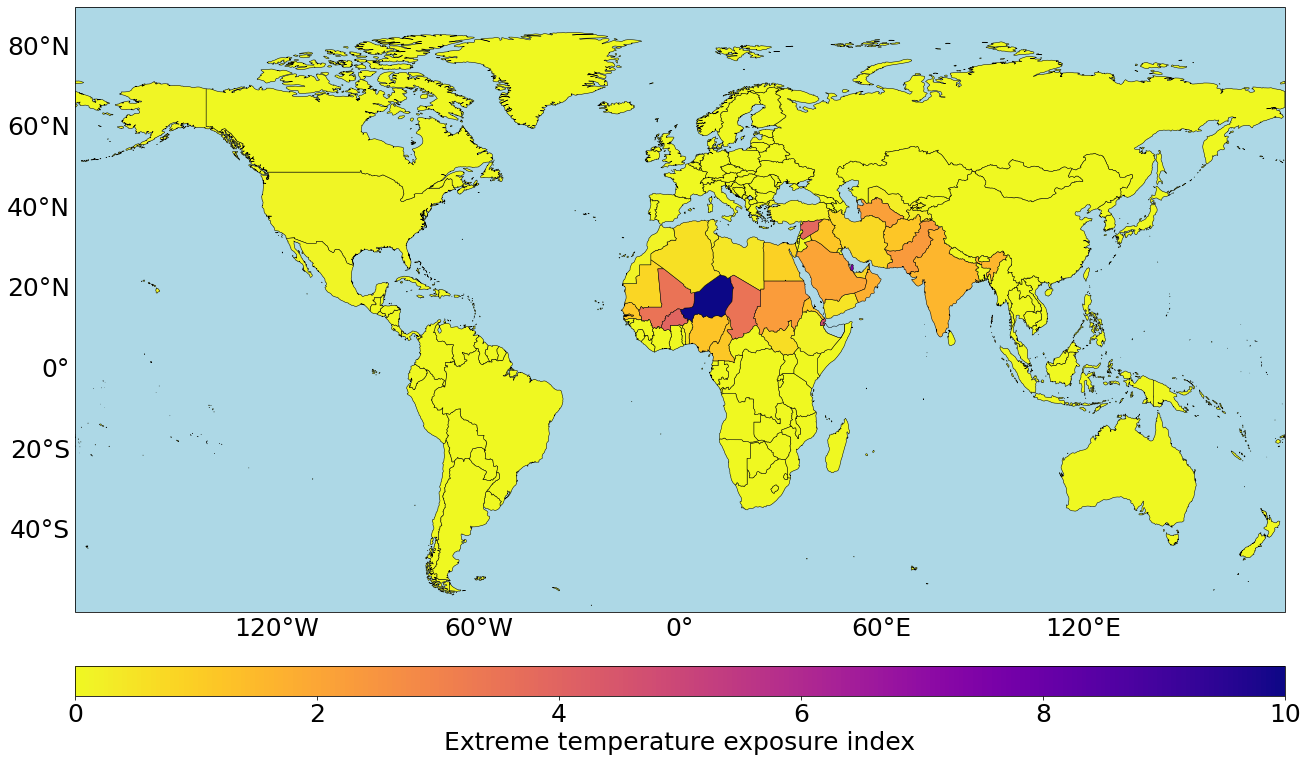

In [16]:
vn_plot = ( "Number of days exceeding 40°C, "
     + "2040-2060, climate scenario SSP2-4.5" )
ds_map = var_f.rename( {v: vn_plot } )
ds_map[vn_plot] = ds_map[vn_plot].fillna(0)
ds_map = ds_map.rio.write_crs(borders.crs)
ds_map = ds_map.rio.set_spatial_dims("lon", "lat")
ds_map = ds_map.rio.clip( borders.dissolve().geometry,
    drop = False, invert = False, all_touched = True )

min = 50 * np.floor( np.nanmin(ds_map[vn_plot].values) * 0.02 )
max = 50 * np.ceil( np.nanmax(ds_map[vn_plot].values) * 0.02 )

v_map = gv.Image( gv.Dataset( ds_map, ["lon", "lat"],
    vdims = gv.Dimension(vn_plot, range = ( min, max) ) )
    ).opts( colorbar = True, cmap = "plasma_r",
    hooks = [hook], ylim = (-60, 90), bgcolor = "lightblue",
    colorbar_opts = {"orientation": "horizontal"} )
img = ( v_map * countries ).opts(aspect = 2, fontscale = 2.5)
gv.output( img, size = 600 )

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-60, 90), bgcolor = "lightblue" )
gv.output( map, size = 600 )

In [17]:
v1 = "climatology-pr-annual-mean"
v2 = "climatology-rx1day-annual-mean"
v = "climatology-percrx1-annual-mean"
tr = 0.05

i = 0
ds_h1 = xr.open_dataset(wb_path + wb_files[i])
i = 9
ds_h2 = xr.open_dataset(wb_path + wb_files[i])
ds_h = ( ds_h2[v2] / ds_h1[v1] ).to_dataset(name = v)
var_h = ds_h.copy()
ds_h[v] = ds_h[v].where( ds_h[v] >= tr, 0 )
ds_h[v] = ds_h[v].where( ds_h[v] == 0, 1 )
ds_h["Exposed population"] = pop_h[p] * ds_h[v]

i = 6
ds_f1 = xr.open_dataset(wb_path + wb_files[i])
i = 3
ds_f2 = xr.open_dataset(wb_path + wb_files[i])
ds_f = ( ds_f2[v2] / ds_f1[v1] ).to_dataset(name = v)
var_f = ds_f.copy()
ds_f[v] = ds_f[v].where( ds_f[v] >= tr, 0 )
ds_f[v] = ds_f[v].where( ds_f[v] == 0, 1 )
ds_f["Exposed population"] = pop_f[p] * ds_f[v]

df_h = ds_h[ [v, "Exposed population"] ].to_dataframe()
df_h["country"] = df_pop_h["country"]
df_h[p] = df_pop_h[p]
df_h = df_h.reset_index().drop(columns = "time").set_index("country")
df_h = df_h[ ~df_h.index.isnull() ]
df_hc = df_h[ [p, "Exposed population"] ].groupby("country").sum()
df_hc["% Exposed population"] = ( df_hc["Exposed population"] / df_hc[p] )

df_f = ds_f[ [v, "Exposed population"] ].to_dataframe()
df_f["country"] = df_pop_f["country"]
df_f[p] = df_pop_f[p]
df_f = df_f.reset_index().drop(columns = "time").set_index("country")
df_f = df_f[ ~df_f.index.isnull() ]
df_fc = df_f[ [p, "Exposed population"] ].groupby("country").sum()
df_fc["% Exposed population"] = ( df_fc["Exposed population"] / df_fc[p] )

vn = "Extreme rainfall exposure index"
df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)
df_fc["NAME"] = names["NAME"]
df_fc[ix] = names[ix]
df_fc = df_fc.reset_index().set_index(ix)

df_iso[vn] = df_fc[vn]
df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

df_fc.sort_values(vn, ascending = False).head(10)

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Extreme rainfall exposure index,NAME
ISO_A3,,,,,,
PCN,612.0,6.500599e+01,6.500599e+01,1.000000,1.000000,Pitcairn Is.
CYP,196.0,1.570686e+06,8.021704e+05,0.510713,0.510713,Cyprus
MAR,504.0,3.823507e+07,3.043352e+07,0.795958,0.236002,Morocco
PSE,275.0,8.080783e+06,4.918146e+06,0.608622,0.204048,Palestine
DZA,12.0,4.888387e+07,3.495999e+07,0.715164,0.192045,Algeria
GRC,300.0,1.120459e+07,6.680048e+06,0.596189,0.143072,Greece
SYR,760.0,3.339885e+07,1.917335e+07,0.574072,0.134808,Syria
TUN,788.0,1.281825e+07,1.217473e+07,0.949797,0.122122,Tunisia
ESP,724.0,5.232599e+07,2.774295e+07,0.530194,0.102012,Spain


In [18]:
df_hc.loc[[242]]

,climatology-popcount-annual-mean,Exposed population,% Exposed population
country,,,
242.0,807657.375,0.0,0.0


In [19]:
df_fc.loc[["FJI"]]

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Extreme rainfall exposure index,NAME
ISO_A3,,,,,,
FJI,242.0,937559.125,0.0,0.0,0.0,Fiji


:Overlay
   .Image.I :Image   [lon,lat]   (1-day maximum rainfall as % of annual rainfall, 2040-2060, climate scenario SSP2-4.5)
   .Path.I  :Path   [Longitude,Latitude]
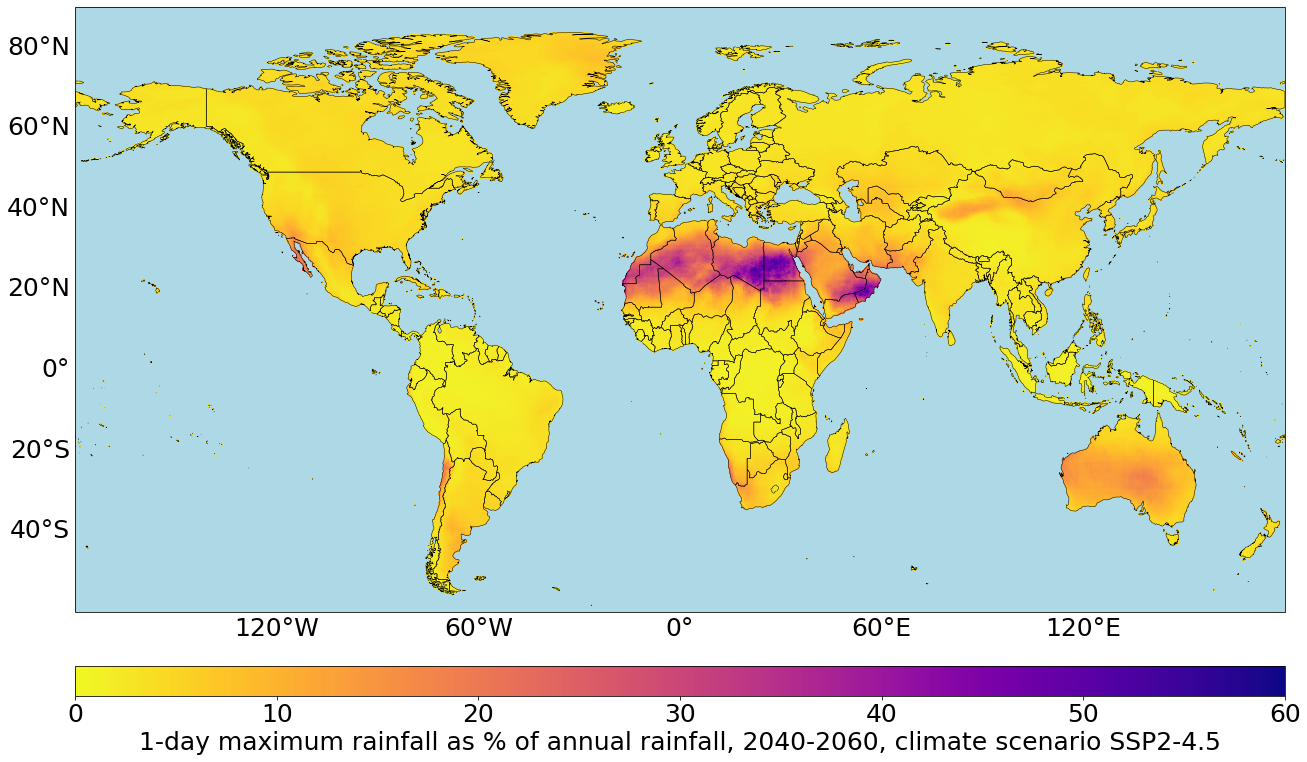

:Polygons   [Longitude,Latitude]   (Extreme rainfall exposure index)
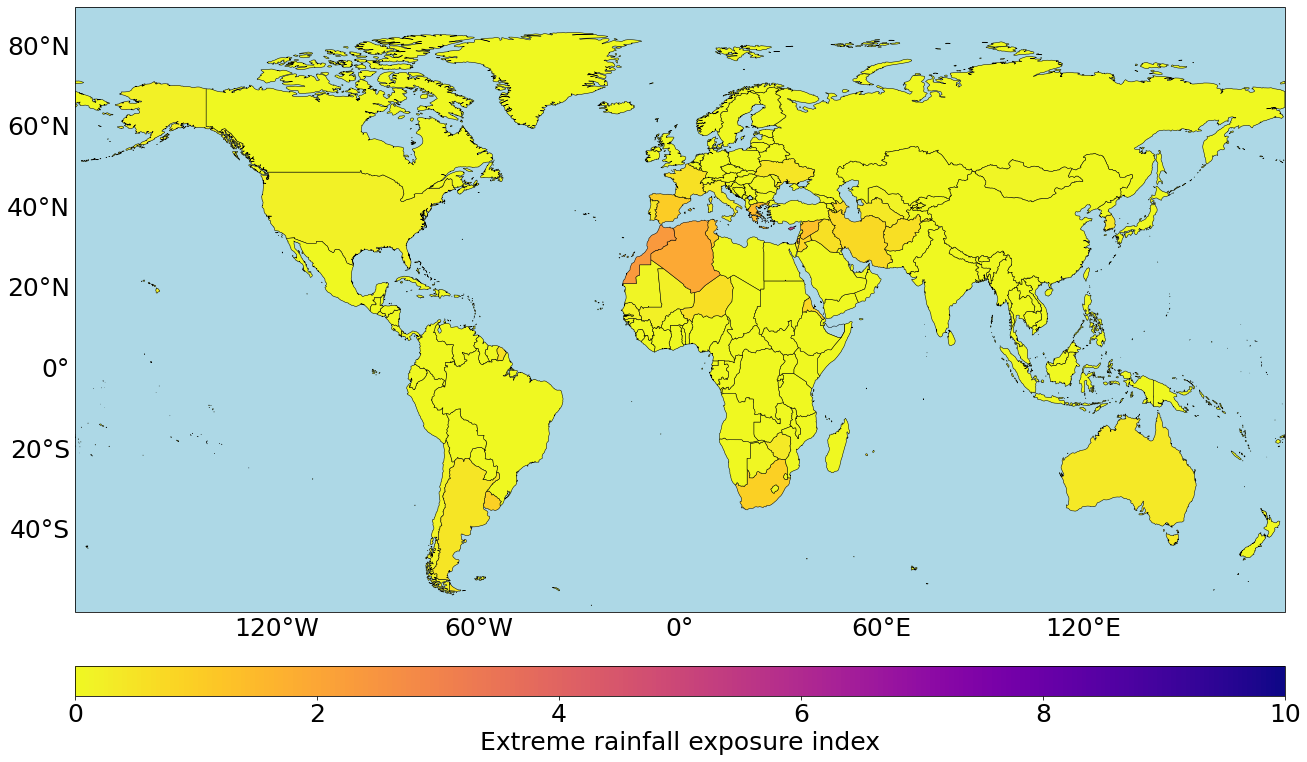

In [20]:
vn_plot = ( "1-day maximum rainfall as % of annual "
     + "rainfall, 2040-2060, climate scenario SSP2-4.5" )
ds_map = var_f.rename( {v: vn_plot } ) * 100
ds_map[vn_plot] = ds_map[vn_plot].fillna(0)
ds_map = ds_map.rio.write_crs(borders.crs)
ds_map = ds_map.rio.set_spatial_dims("lon", "lat")
ds_map = ds_map.rio.clip( borders.dissolve().geometry,
    drop = False, invert = False, all_touched = True )

min = np.floor( np.nanmin(ds_map[vn_plot].values) )
max = np.ceil( np.nanmax(ds_map[vn_plot].values) )

v_map = gv.Image( gv.Dataset( ds_map, ["lon", "lat"],
    vdims = gv.Dimension(vn_plot, range = ( min, max ) ) )
    ).opts( colorbar = True, cmap = "plasma_r",
    hooks = [hook], ylim = (-60, 90), bgcolor = "lightblue",
    colorbar_opts = {"orientation": "horizontal"} )
img = ( v_map * countries ).opts(aspect = 2, fontscale = 2.5)
gv.output( img, size = 600 )

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-60, 90), bgcolor = "lightblue" )
gv.output( map, size = 600 )

In [21]:
f = "../../Bases_de_datos/GAR2015/VIENTO_MUNDO_TR100_INT1.grd"
v = "100_year_hurricane_wind"
hurr = rio.open_rasterio(f).to_dataset( "band"
    ).rename( {"x": "lon", "y": "lat", 1: v})
regridder = xe.Regridder( hurr, pop_h, method = "bilinear", )#periodic = True )

tr = 209

var_h = regridder( hurr, keep_attrs = True )
var_f = var_h * 1.1

ds_h = var_h.copy()
ds_f = var_f.copy()

ds_h[v] = ds_h[v].where( ds_h[v] >= tr, 0 )
ds_h[v] = ds_h[v].where( ds_h[v] == 0, 1 )
ds_h["Exposed population"] = pop_h[p] * ds_h[v]

ds_f[v] = ds_f[v].where( ds_f[v] >= tr, 0 )
ds_f[v] = ds_f[v].where( ds_f[v] == 0, 1 )
ds_f["Exposed population"] = pop_f[p] * ds_f[v]

df_h = ds_h[ [v, "Exposed population"] ].to_dataframe()
df_h["country"] = df_pop_h["country"].reset_index(level = 0, drop = True)
df_h[p] = df_pop_h[p].reset_index(level = 0, drop = True)
df_h = df_h.reset_index().drop(columns = "time").set_index("country")
df_h = df_h[ ~df_h.index.isnull() ]
df_hc = df_h[ [p, "Exposed population"] ].groupby("country").sum()
df_hc["% Exposed population"] = ( df_hc["Exposed population"] / df_hc[p] )

df_f = ds_f[ [v, "Exposed population"] ].to_dataframe()
df_f["country"] = df_pop_f["country"].reset_index(level = 0, drop = True)
df_f[p] = df_pop_f[p].reset_index(level = 0, drop = True)
df_f = df_f.reset_index().drop(columns = "time").set_index("country")
df_f = df_f[ ~df_f.index.isnull() ]
df_fc = df_f[ [p, "Exposed population"] ].groupby("country").sum()
df_fc["% Exposed population"] = ( df_fc["Exposed population"] / df_fc[p] )

vn = "Hurricane exposure index"
df_fc[vn] = df_fc["% Exposed population"] - df_hc["% Exposed population"]
names = borders[ ["NAME", "ISO_N3_EH"] ].drop_duplicates(
    subset = "ISO_N3_EH" ).reset_index().set_index("ISO_N3_EH")
names.index = names.index.astype(int)
df_fc["NAME"] = names["NAME"]
df_fc[ix] = names[ix]
df_fc = df_fc.reset_index().set_index(ix)

df_iso[vn] = df_fc[vn]
df_iso[vn] = df_iso[vn].where( df_iso[vn] > 0, 0 )
min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * ( df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

df_fc.sort_values(vn, ascending = False).head(10)

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Hurricane exposure index,NAME
ISO_A3,,,,,,
BLM,652.0,1.513041e+03,1.513041e+03,1.0,1.0,St-Barthélemy
BMU,60.0,5.805174e+04,5.805174e+04,1.0,1.0,Bermuda
PRI,630.0,2.962510e+06,2.962510e+06,1.0,1.0,Puerto Rico
TCA,796.0,2.980348e+04,2.980348e+04,1.0,1.0,Turks and Caicos Is.
SXM,534.0,7.091215e+04,7.091215e+04,1.0,1.0,Sint Maarten
MSR,500.0,5.999655e+03,5.999655e+03,1.0,1.0,Montserrat
VGB,92.0,3.209677e+04,3.209677e+04,1.0,1.0,British Virgin Is.
VIR,850.0,1.174074e+05,1.174074e+05,1.0,1.0,U.S. Virgin Is.
AIA,660.0,1.520326e+04,1.520326e+04,1.0,1.0,Anguilla


In [22]:
df_hc.loc[[242]]

,climatology-popcount-annual-mean,Exposed population,% Exposed population
country,,,
242.0,807657.375,0.0,0.0


In [23]:
df_fc.loc[["FJI"]]

,country,climatology-popcount-annual-mean,Exposed population,% Exposed population,Hurricane exposure index,NAME
ISO_A3,,,,,,
FJI,242.0,937559.125,10419.916016,0.011114,0.011114,Fiji


:Overlay
   .Image.I :Image   [lon,lat]   (Hurricane wind, 100-year return period [km/h],2040-2060, climate scenario SSP2-4.5)
   .Path.I  :Path   [Longitude,Latitude]
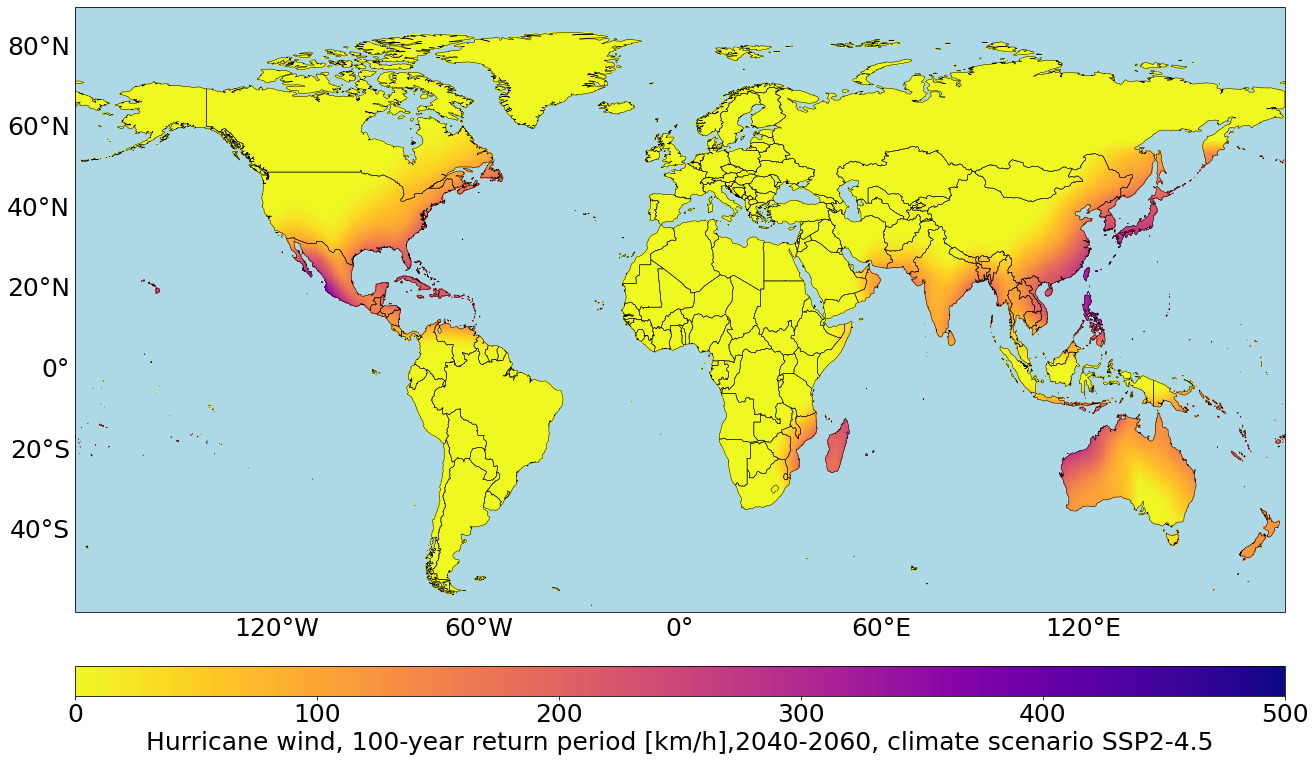

:Polygons   [Longitude,Latitude]   (Hurricane exposure index)
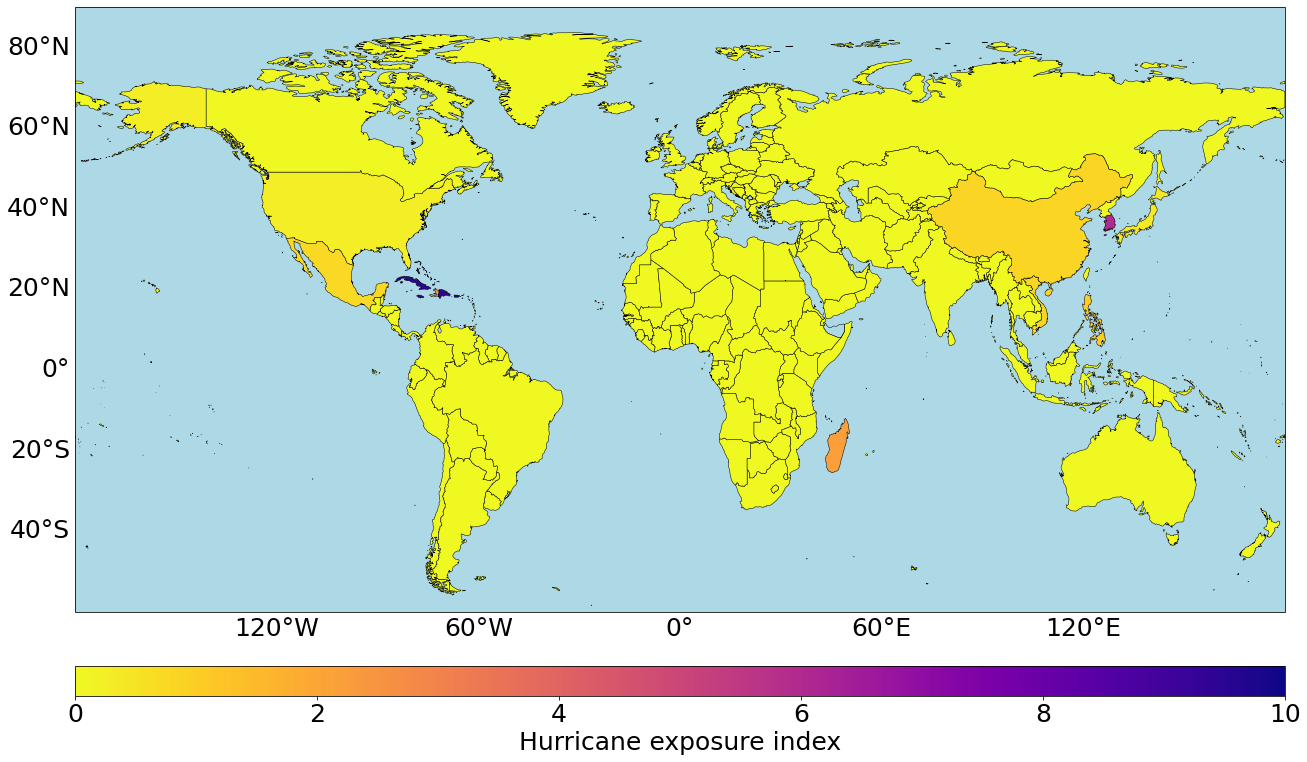

In [24]:
vn_plot = ( "Hurricane wind, 100-year return period [km/h],"
    + "2040-2060, climate scenario SSP2-4.5" )
ds_map = var_f.rename( {"100_year_hurricane_wind": vn_plot } )
ds_map[vn_plot] = ds_map[vn_plot].fillna(0)
ds_map = ds_map.rio.write_crs(borders.crs)
ds_map = ds_map.rio.set_spatial_dims("lon", "lat")
ds_map = ds_map.rio.clip( borders.dissolve().geometry,
    drop = False, invert = False, all_touched = True )

min = np.floor( np.nanmin(ds_map[vn_plot].values) / 50 ) * 50
max = np.ceil( np.nanmax(ds_map[vn_plot].values) / 50 ) * 50

v_map = gv.Image( gv.Dataset( ds_map, ["lon", "lat"],
    vdims = gv.Dimension(vn_plot, range = ( min, max ) ) )
    ).opts( colorbar = True, cmap = "plasma_r",
    hooks = [hook], ylim = (-60, 90), bgcolor = "lightblue",
    colorbar_opts = {"orientation": "horizontal"} )
img = ( v_map * countries ).opts(aspect = 2, fontscale = 2.5)
gv.output( img, size = 600 )

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-60, 90), bgcolor = "lightblue" )
gv.output( map, size = 600 )

:Polygons   [Longitude,Latitude]   (Climate change exposure index)
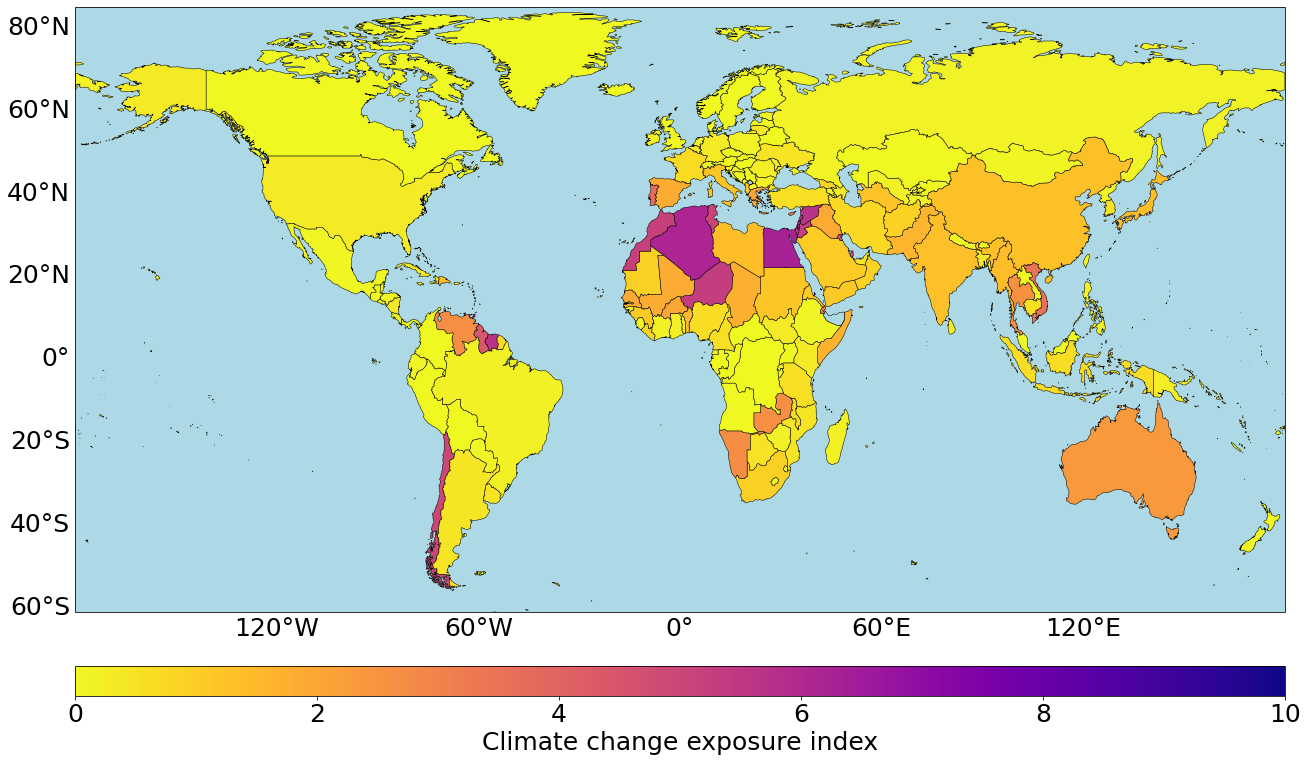

,name,Climate change exposure index
ISO_A3,,
PCN,Pitcairn,10.000000
EGY,Egypt,6.279700
DZA,Algeria,6.142751
PSE,"Palestine, State of",6.020241
DMA,Dominica,5.977427
TTO,Trinidad and Tobago,5.963471
SYR,Syrian Arab Republic,5.672816
SUR,Suriname,5.669653
ISR,Israel,5.381654


In [25]:
vn = "Climate change exposure index"
df_iso[vn] = df_iso.iloc[:, -5:-1].sum(axis = 1)

min_v = df_iso[vn].min()
max_v = df_iso[vn].max()
rng_v = max_v - min_v
df_iso[vn] = 10 * (df_iso[vn] - min_v ) / rng_v
borders[vn] = df_iso[vn]

map = gv.Polygons( borders, vdims = vn ).opts(
    colorbar = True, cmap = "plasma_r", linewidth = 0.5,
    hooks = [hook], colorbar_opts = {"orientation": "horizontal"},
    aspect = 2, fontscale = 2.5, ylim = (-61, 85), bgcolor = "lightblue" )
gv.output( map, size = 600 )

df_iso.to_csv(path_r + "climate_index.csv")

df_iso[["name", vn]].sort_values( vn, ascending = False ).head(10)

In [26]:
df_iso.loc[["FJI"]]

,name,alpha-2,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code,OECD,EU27,BRICS+,BRICS,Sea-level rise exposure index,Drought exposure index,Extreme temperature exposure index,Extreme rainfall exposure index,Hurricane exposure index,Climate change exposure index
ISO_A3,,,,,,,,,,,,,,,,,,,,
FJI,Fiji,FJ,242,ISO 3166-2:FJ,Oceania,Melanesia,NaN,9.0,54.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.111139,0.0


In [27]:
borders.loc[["FJI"]]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_BD,FCLASS_UA,geometry,Area,Sea-level rise exposure index,Drought exposure index,Extreme temperature exposure index,Extreme rainfall exposure index,Hurricane exposure index,Climate change exposure index
ISO_A3,,,,,,,,,,,,,,,,,,,,,
FJI,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,"MULTIPOLYGON (((179.99922 -16.16855, 179.84824...",1.834634e+10,0.0,0.0,0.0,0.0,0.111139,0.0
